In [1]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.8/462.8 KB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 10.5 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [2]:
import torch
import datasets

In [3]:
dataset = datasets.load_dataset('imdb') #importa o dataset de reviews do IMDB

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb downloaded and prepared to /root/.cache/huggingface/datasets/imdb/plain_text/1.0.0/2fdd8b9bcadd6e7055e742a706876ba43f19faee861df134affd7a3f60fc38a1. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [4]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})

In [5]:
print(type(dataset))

<class 'datasets.dataset_dict.DatasetDict'>


In [6]:
dataset['train'] #dataset de treino

Dataset({
    features: ['text', 'label'],
    num_rows: 25000
})

In [7]:
dataset['train']['text'][0]

'I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far between, ev

In [8]:
dataset['train']['label'][0]

0

In [9]:
from torchtext.data.utils import get_tokenizer
tokenizer = get_tokenizer('basic_english')

In [10]:
def split_tokens(row):
    row['tokens'] = tokenizer(row['text'])
    return row

In [11]:
dataset = dataset.map(split_tokens)

  0%|          | 0/25000 [00:00<?, ?ex/s]

  0%|          | 0/25000 [00:00<?, ?ex/s]

  0%|          | 0/50000 [00:00<?, ?ex/s]

In [12]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'tokens'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label', 'tokens'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label', 'tokens'],
        num_rows: 50000
    })
})

In [13]:
dataset['train']['tokens'][0]

['i',
 'rented',
 'i',
 'am',
 'curious-yellow',
 'from',
 'my',
 'video',
 'store',
 'because',
 'of',
 'all',
 'the',
 'controversy',
 'that',
 'surrounded',
 'it',
 'when',
 'it',
 'was',
 'first',
 'released',
 'in',
 '1967',
 '.',
 'i',
 'also',
 'heard',
 'that',
 'at',
 'first',
 'it',
 'was',
 'seized',
 'by',
 'u',
 '.',
 's',
 '.',
 'customs',
 'if',
 'it',
 'ever',
 'tried',
 'to',
 'enter',
 'this',
 'country',
 ',',
 'therefore',
 'being',
 'a',
 'fan',
 'of',
 'films',
 'considered',
 'controversial',
 'i',
 'really',
 'had',
 'to',
 'see',
 'this',
 'for',
 'myself',
 '.',
 'the',
 'plot',
 'is',
 'centered',
 'around',
 'a',
 'young',
 'swedish',
 'drama',
 'student',
 'named',
 'lena',
 'who',
 'wants',
 'to',
 'learn',
 'everything',
 'she',
 'can',
 'about',
 'life',
 '.',
 'in',
 'particular',
 'she',
 'wants',
 'to',
 'focus',
 'her',
 'attentions',
 'to',
 'making',
 'some',
 'sort',
 'of',
 'documentary',
 'on',
 'what',
 'the',
 'average',
 'swede',
 'thought',


In [14]:
from torchtext.vocab import build_vocab_from_iterator

vocab = build_vocab_from_iterator(dataset['train']['tokens'], max_tokens=10000,
                                  specials=['<unk>'])
vocab.set_default_index(vocab['<unk>'])

In [15]:
vocab['mind']

347

In [16]:
vocab(['here', 'is', 'an', 'example'])

[131, 9, 40, 464]

In [17]:
def token2id(row):
    row['tokens_id'] = vocab(row['tokens'])
    return row

In [18]:
print(type(dataset['train']['tokens'][0]))
print(dataset['train']['tokens'][0])

<class 'list'>
['i', 'rented', 'i', 'am', 'curious-yellow', 'from', 'my', 'video', 'store', 'because', 'of', 'all', 'the', 'controversy', 'that', 'surrounded', 'it', 'when', 'it', 'was', 'first', 'released', 'in', '1967', '.', 'i', 'also', 'heard', 'that', 'at', 'first', 'it', 'was', 'seized', 'by', 'u', '.', 's', '.', 'customs', 'if', 'it', 'ever', 'tried', 'to', 'enter', 'this', 'country', ',', 'therefore', 'being', 'a', 'fan', 'of', 'films', 'considered', 'controversial', 'i', 'really', 'had', 'to', 'see', 'this', 'for', 'myself', '.', 'the', 'plot', 'is', 'centered', 'around', 'a', 'young', 'swedish', 'drama', 'student', 'named', 'lena', 'who', 'wants', 'to', 'learn', 'everything', 'she', 'can', 'about', 'life', '.', 'in', 'particular', 'she', 'wants', 'to', 'focus', 'her', 'attentions', 'to', 'making', 'some', 'sort', 'of', 'documentary', 'on', 'what', 'the', 'average', 'swede', 'thought', 'about', 'certain', 'political', 'issues', 'such', 'as', 'the', 'vietnam', 'war', 'and', 'ra

In [19]:
dataset = dataset.map(token2id)

  0%|          | 0/25000 [00:00<?, ?ex/s]

  0%|          | 0/25000 [00:00<?, ?ex/s]

  0%|          | 0/50000 [00:00<?, ?ex/s]

In [20]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'tokens', 'tokens_id'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label', 'tokens', 'tokens_id'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label', 'tokens', 'tokens_id'],
        num_rows: 50000
    })
})

In [21]:
dataset['train']['tokens_id'][0]

[12,
 1567,
 12,
 245,
 0,
 42,
 63,
 397,
 1134,
 91,
 6,
 36,
 1,
 7125,
 14,
 3362,
 10,
 59,
 10,
 16,
 93,
 628,
 11,
 6920,
 2,
 12,
 86,
 552,
 14,
 37,
 93,
 10,
 16,
 0,
 39,
 1224,
 2,
 15,
 2,
 9262,
 50,
 10,
 130,
 779,
 7,
 2479,
 13,
 681,
 3,
 1574,
 117,
 5,
 341,
 6,
 113,
 1159,
 3051,
 12,
 71,
 74,
 7,
 73,
 13,
 18,
 536,
 2,
 1,
 120,
 9,
 5958,
 193,
 5,
 190,
 3861,
 473,
 1423,
 765,
 4313,
 41,
 488,
 7,
 833,
 286,
 60,
 57,
 49,
 126,
 2,
 11,
 825,
 60,
 488,
 7,
 1131,
 46,
 0,
 7,
 256,
 55,
 440,
 6,
 668,
 27,
 53,
 1,
 862,
 0,
 208,
 49,
 780,
 1000,
 1303,
 146,
 17,
 1,
 2674,
 336,
 4,
 1509,
 1303,
 11,
 1,
 2358,
 1591,
 2,
 11,
 202,
 2181,
 7270,
 4,
 1918,
 0,
 6,
 0,
 49,
 72,
 4655,
 27,
 2380,
 3,
 60,
 51,
 401,
 19,
 46,
 473,
 1691,
 3,
 8134,
 3,
 4,
 998,
 346,
 2,
 53,
 1079,
 77,
 49,
 12,
 245,
 0,
 9,
 14,
 1613,
 160,
 586,
 3,
 13,
 16,
 1159,
 8205,
 2,
 71,
 3,
 1,
 401,
 4,
 999,
 144,
 30,
 174,
 4,
 241,
 202,
 3,
 62,
 100

In [22]:
from torch.utils.data import Dataset, DataLoader

In [23]:
class IMDBDataset(Dataset):
  def __init__(self, dataset, vocab_size):
    self.dataset = dataset
    self.vocab_size = vocab_size
    self.data = dataset['tokens_id']

  def __len__(self):
    return len(self.data)

  def __getitem__(self, idx):
    result = torch.zeros(self.vocab_size)
    return result.index_fill(0, torch.tensor(self.data[idx]), 1), torch.tensor(self.dataset['label'][idx], dtype=torch.float32)

In [24]:
BATCH_SIZE = 128
dataloader = DataLoader(IMDBDataset(dataset['train'], len(vocab)),
                        batch_size=BATCH_SIZE, shuffle=True)

In [25]:
len(vocab)

10000

In [26]:
for X, y in dataloader:
    print('X shape: ', X.shape)
    print('y shape: ', y.shape, y.dtype)
    break

X shape:  torch.Size([128, 10000])
y shape:  torch.Size([128]) torch.float32


In [27]:
from torch import nn

class TextClassifier(nn.Module):
  def __init__(self, vocab_size):
    super(TextClassifier, self).__init__()

    self.linear_stack = nn.Sequential(
        nn.Linear(vocab_size, 16),
        nn.ReLU(),
        nn.Linear(16, 16),
        nn.ReLU(),
        nn.Linear(16, 1),
        nn.Sigmoid()
    )

  def forward(self, input):
    return self.linear_stack(input)

In [28]:
model = TextClassifier(len(vocab))

In [29]:
device = torch.device('cuda')
model.to(device)

TextClassifier(
  (linear_stack): Sequential(
    (0): Linear(in_features=10000, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=1, bias=True)
    (5): Sigmoid()
  )
)

In [30]:
LR = 3e-2
EPOCHS = 3
loss_fn = nn.BCELoss()  # loss function para problemas com duas classes
optimizer = torch.optim.SGD(model.parameters(), lr=LR)

In [34]:
from tqdm import tqdm

progress_bar = tqdm(range(EPOCHS*len(dataloader)))

running_loss = []
for epoch in range(EPOCHS):

  epoch_loss = 0
  for X, y in dataloader:
    X, y = X.to(device), y.to(device)
    out = torch.flatten(model(X))

    loss = loss_fn(out, y)
    epoch_loss += loss.item()

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    progress_bar.update(1)

  epoch_loss = epoch_loss / len(dataloader)
  running_loss.append(epoch_loss)
  print('epoch loss:', epoch_loss)

 33%|███▎      | 196/588 [04:11<07:43,  1.18s/it]

epoch loss: 0.677846552461994


 67%|██████▋   | 392/588 [08:12<02:56,  1.11it/s]

epoch loss: 0.5840387362606672


100%|██████████| 588/588 [12:11<00:00,  1.08it/s]

epoch loss: 0.40161000496270705


In [35]:
running_loss

[0.677846552461994, 0.5840387362606672, 0.40161000496270705]

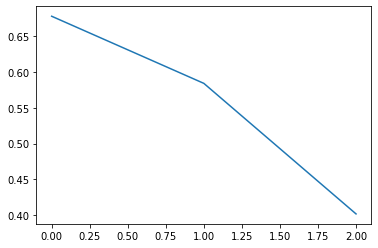

In [36]:
import matplotlib.pyplot as plt
plt.plot(running_loss)

In [37]:
dataloader_test = DataLoader(IMDBDataset(dataset['test'], len(vocab)), batch_size=BATCH_SIZE, shuffle=True)

In [ ]:
import numpy as np

correct = 0
total = 0

for X, y in dataloader_test:
  model.eval()
  X, y = X.to(device), y.to(device)
  out = torch.flatten(model(X))

  out_cpu = out.cpu().detach().numpy()
  label_cpu = y.cpu().detach().numpy().astype(int)

  out_labels = np.vectorize(lambda x: 1 if x > 0.5 else 0)(out_cpu)

  correct += np.sum(out_labels == label_cpu)
  total += len(out_labels)

print(correct/total)

0.85296
